# Google Practicum

## Exploratory Analysis: Illinois Maize Data

In [16]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/uditanand/Desktop/Github/GooglePracticum


In [3]:
# Import Names of counties from file
maize_data_dir = cwd + '/Data/Maize/'
IL_county_data = maize_data_dir + 'County_Names_IL.csv'
county_data = pd.read_csv(IL_county_data)

# rename Ag district to Ag_District
county_data.rename(columns={'Ag District': 'Ag_District'}, inplace=True)

# making all column names UPPER CASE --> inline with the weather data file
county_data.columns = map(str.upper, county_data.columns)

# making COUNTY, STATE, AG DISTRICT, COMMODITY data lower case
# CAN BE MADE FASTER WITH A LAMBDA FUNCTION
county_data.STATE = county_data.STATE.str.lower()
county_data.AG_DISTRICT = county_data.AG_DISTRICT.str.lower()
county_data.COUNTY = county_data.COUNTY.str.lower() 
county_data.COMMODITY = county_data.COMMODITY.str.lower()

print(county_data.head())

# Print name of unique districts
ag_district_list = list(county_data['AG_DISTRICT'].unique())
print(" \n Agricultural Districts: \n")
print(ag_district_list)

      STATE AG_DISTRICT      COUNTY COMMODITY     VALUE
0  illinois     central      mclean      corn  70340000
1  illinois     central       logan      corn  43723000
2  illinois     central    tazewell      corn  33978000
3  illinois        east  livingston      corn  63438000
4  illinois        east    iroquois      corn  62228000
 
 Agricultural Districts: 

['central', 'east', 'east southeast', 'northeast', 'northwest', 'southeast', 'southwest', 'west', 'west southwest']


In [4]:
# Group counties belonging to a particular agricultural district and store them in a dictionary

district_county_dict = {}

for district in ag_district_list:
    county_in_ag_district = county_data[(county_data['AG_DISTRICT'] == district)] 
    county_in_ag_district = county_in_ag_district['COUNTY']
    district_county_dict[district] = county_in_ag_district

# Print the dictionary, Structure {Region_1: County_1, County_2 ,... ; Region_2: County_1, County_2.. }
for key,values in district_county_dict.items():
    print(key)
    print(values)
    print("\n")


central
0      mclean
1       logan
2    tazewell
Name: COUNTY, dtype: object


east
3    livingston
4      iroquois
5     champaign
Name: COUNTY, dtype: object


east southeast
6      edgar
7     shelby
8    douglas
Name: COUNTY, dtype: object


northeast
9     la salle
10     de kalb
11      grundy
Name: COUNTY, dtype: object


northwest
12    bureau
13       lee
14      ogle
Name: COUNTY, dtype: object


southeast
15    gallatin
16       white
17    hamilton
Name: COUNTY, dtype: object


southwest
18      st clair
19       clinton
20    washington
Name: COUNTY, dtype: object


west
21     warren
22    hancock
23       knox
Name: COUNTY, dtype: object


west southwest
24     sangamon
25    christian
26     macoupin
Name: COUNTY, dtype: object




In [5]:
#NOTE: 
#-----
# Sample code for accessing a particular value in the dictionary

# values = district_county_dict['CENTRAL']
# print(values)
# print("\n")
# print(values[0])

In [6]:
# Import weather data file
weather_data_dir = cwd + '/Data/Weather/'
sample_weather_file = weather_data_dir + 'weather_data.csv'
sample_weather_data = pd.read_csv(sample_weather_file)

print("\n Column Information \n")
print(sample_weather_data.columns.all)



 Column Information 

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Index(['INDEX', 'COUNTY', 'YEAR', 'MONTH', 'TMP_HIGH', 'TMP_AVG', 'TMP_LOW',
       'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW',
       'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG',
       'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM'],
      dtype='object')>


In [7]:
# Append corresponding AGRICULTURAL DISTRICT to COUNTY
sample_weather_data['AG_DISTRICT'] = "Dummy"

# reorder the AG_DISTRICT to become the first column
colnames = sample_weather_data.columns.tolist()
colnames = colnames[-1:] + colnames[:-1]
sample_weather_data = sample_weather_data[colnames]

county_names_list = list(county_data['COUNTY'].unique())

for county in county_names_list:
    county_district = county_data[(county_data['COUNTY'] == county)] 
    county_district = county_district['AG_DISTRICT']
    
    selected_county = sample_weather_data[(sample_weather_data['COUNTY'] == county)]
    
    sample_weather_data.loc[sample_weather_data['COUNTY'] == county, 'AG_DISTRICT'] = county_district.values

sample_weather_data.loc[:,['AG_DISTRICT','COUNTY']].head()
sample_weather_data.head()
# sample_weather_data.iloc[:,5:26]

,AG_DISTRICT,INDEX,COUNTY,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
0,central,0,mclean,2001,JAN,41.0,24.935484,3.0,37.0,22.032258,...,20.0,7.774194,0.0,21.0,9.322581,0.0,5.0,10.0,4.0,0.0
1,central,1,mclean,2001,FEB,57.0,28.964286,-2.0,55.0,22.892857,...,20.0,9.464286,0.0,24.0,10.035714,0.0,7.0,7.0,2.0,3.0
2,central,2,mclean,2001,MAR,59.0,36.225806,15.0,50.0,26.193548,...,20.0,11.000000,1.0,20.0,9.322581,0.0,6.0,5.0,1.0,0.0
3,central,3,mclean,2001,ARP,84.0,57.533333,28.0,68.0,42.566667,...,20.0,12.033333,1.0,23.0,10.466667,0.0,8.0,1.0,0.0,3.0
4,central,4,mclean,2001,MAY,89.0,63.935484,44.0,68.0,51.709677,...,20.0,10.580645,0.0,25.0,8.129032,0.0,11.0,0.0,2.0,2.0


In [8]:
# NOTE: HANDLE WITH CARE. DO NOT UNCOMMENT
#groupby_ag_district_month_year = sample_weather_data.groupby(['YEAR', 'MONTH', 'AG_DISTRICT'])
#print("\n Average Precipitation: \n")
#print(groupby_ag_district_month_year['PRECIP'].mean())



 Average Precipitation: 

AG_DISTRICT
central           2.354067
east              3.731901
east southeast    4.082900
northeast         1.584188
northwest         4.577401
southeast         2.206111
southwest         4.904592
west              2.004545
west southwest    2.215637
Name: PRECIP, dtype: float64


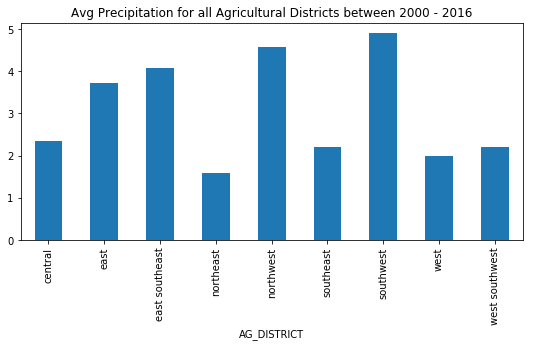

In [31]:
groupby_ag_district = sample_weather_data.groupby(['AG_DISTRICT'])
print("\n Average Precipitation: \n")
print(groupby_ag_district['PRECIP'].mean())

# Plot variables 
precp_title = "Avg Precipitation for all Agricultural Districts between 2000 - 2016"
groupby_ag_district['PRECIP'].mean().plot(kind='bar', title = precp_title, figsize=(9, 4))

In [ ]:
groupby_ag_district['PRECIP', 'TMP_AVG','WIND_AVG'].mean().plot(legend=True, kind='bar', title = precp_title, figsize=(9, 4))

In [10]:
# Selecting all data for a particular AG_District